In [1]:
from gates import *
from states import *
from measurements import *
from utils import *
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

In [2]:
batch_size = 128
n_photons = 20
num_params = 4
num_iteration = 1000
initial_state = np.zeros((batch_size, n_photons))
initial_state[:, 0] = 1.
gate2 = S_gate(np.array([1.0]), np.array([np.pi/4.]) , n_photons) 
gate3 = D_gate(np.array([1.]), np.array([0.]), n_photons)

state = np.einsum('ijk,ik->ij', gate2, initial_state)
initial_state = np.einsum('ijk,ik->ij', gate3, state)

# gamma, r1, phi1, r2, phi2, theta1
params = 0.01*np.ones(num_params)
lr = 1e-2 # learning rate

Initial_state


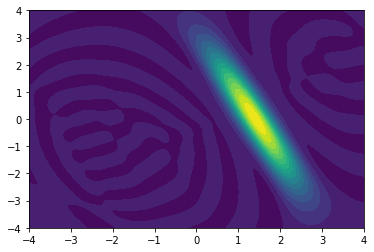

In [3]:
print("Initial_state")
init_state = initial_state[0]
init_state = init_state.reshape(init_state.shape[0],1)
rho = np.kron(init_state,init_state.conj().T)
xvec = np.linspace(-4,4,200)
W = wigner_iterative(rho, xvec, xvec)
cont0 = plt.contourf(xvec, xvec, W, 20)
plt.show()

In [ ]:
def circuit(init_state, params, batch_size, num_params, n_photons):
    random_numbers = 0.1*np.random.randn(num_params*batch_size).reshape(batch_size, num_params)
    
    gate2 = D_gate(params[2] + random_numbers[:,2], params[3] + random_numbers[:,3], n_photons) # displacement
    gate3 = S_gate(params[0] + random_numbers[:,0], params[1] + random_numbers[:,1], n_photons) # squeezing
    
    
    state = np.einsum('ijk,ik->ij', gate2, init_state)
    state = np.einsum('ijk,ik->ij', gate3, state)
    
    data_X = meas_X(state, n_photons)
    data_P = meas_P(state, n_photons)
    return random_numbers, data_X, data_P

def mean_moment(quadrature):
    return np.mean(quadrature, axis=1)

def calc_loss(X, P):
    X_mean = mean_moment(X)
    P_mean = mean_moment(P)
    return X_mean**2 + P_mean**2


In [ ]:
for i in range(num_iteration):
    rand_num, X, P = circuit(initial_state, params, batch_size, num_params, n_photons)
    loss = calc_loss(X, P)
    if i%10 ==0: print("Iteration = {} --- loss_value {}".format(i, np.mean(loss)))
    loss = (loss - np.mean(loss))/(np.std(loss)+1e-8)
    for j in range(num_params):
        params[j] -= lr*loss@rand_num[:,j]

Iteration = 0 --- loss_value 1.9627828516675723
Iteration = 10 --- loss_value 0.09354039567207428
Iteration = 20 --- loss_value 0.07414428871324064
Iteration = 30 --- loss_value 0.07098333597434403
Iteration = 40 --- loss_value 0.07140168584919826
Iteration = 50 --- loss_value 0.04825096299085303
Iteration = 60 --- loss_value 0.06715653642618447
Iteration = 70 --- loss_value 0.07728453320156436
Iteration = 80 --- loss_value 0.07263185228987334
Iteration = 90 --- loss_value 0.06538660147822344
Iteration = 100 --- loss_value 0.07875747321658336
Iteration = 110 --- loss_value 0.059352089871695886
Iteration = 120 --- loss_value 0.06845756629122193
Iteration = 130 --- loss_value 0.08819911686976051
Iteration = 140 --- loss_value 0.09341941225743809
Iteration = 150 --- loss_value 0.05200599665985549
Iteration = 160 --- loss_value 0.05933021370783584
Iteration = 170 --- loss_value 0.07279001147830598
Iteration = 180 --- loss_value 0.07183422981037732
Iteration = 190 --- loss_value 0.061504377

In [ ]:
print(*params)

In [ ]:
def test(params, init_state):
    gate2 = D_gate(params[2], params[3], n_photons) # displacement
    gate3 = S_gate(params[0], params[1], n_photons) # squeezing
    state = np.einsum('ijk,ik->ij', gate2, init_state)
    state = np.einsum('ijk,ik->ij', gate3, state)
    return state[0].reshape(state.shape[1],1)

In [ ]:
new_state = test(params, initial_state)
rho = np.kron(new_state,new_state.conj().T)

In [ ]:
print("Final_state")
xvec = np.linspace(-5,5,200)
W = wigner_iterative(rho, xvec, xvec)
cont0 = plt.contourf(xvec, xvec, W, 20)
plt.show()